In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests

In [274]:
def download(url, filename):
    response=requests.get(url)
    if response.status_code==200:
        with open(filename, "wb") as f:
            f.write(response.content)

file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
download(file_path, "usedcars.csv")

In [275]:
file_name="usedcars.csv"

In [276]:
df=pd.read_csv(file_name)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


1. Linear Regression and Multiple Linear Regression

Let's load the modules for linear regression

In [277]:
from sklearn.linear_model import LinearRegression

In [278]:
lm=LinearRegression()
lm

LinearRegression()

How could "highway-mpg" help us predict car price?

In [279]:
X=df[['highway-mpg']]
Y=df['price']

In [280]:
lm.fit(X,Y)

LinearRegression()

In [281]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])


What is the value of the intercept (a)?

In [282]:
lm.intercept_

38423.3058581574

What is the value of the slope (b)?

In [283]:
lm.coef_

array([-821.73337832])


What is the final estimated linear model we get?

Create a linear regression object called "lm1"

In [284]:
lm1=LinearRegression()
lm1

LinearRegression()

Train the model using "engine-size" as the independent variable and "price" as the dependent variable?

In [285]:
df.dtypes['engine-size']

dtype('int64')

In [286]:
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression()

Find the slope and intercept of the model.

In [287]:
#Slope
print(lm1.coef_)

#Intercept
print(lm1.intercept_)

[[166.86001569]]
[-7963.33890628]


What is the equation of the predicted line? You can use x and yhat or "engine-size" or "price".

In [288]:
#using X and Y
Yhat=-7963.34 + 166.86*X
print(Yhat)

Price=-7963.34 + 166.86*df['engine-size']
print(Price)

     highway-mpg
0       -3458.12
1       -3458.12
2       -3624.98
3       -2957.54
4       -4292.42
..           ...
196     -3291.26
197     -3791.84
198     -4125.56
199     -3458.12
200     -3791.84

[201 rows x 1 columns]
0      13728.46
1      13728.46
2      17399.38
3      10224.40
4      14729.62
         ...   
196    15563.92
197    15563.92
198    20903.44
199    16231.36
200    15563.92
Name: engine-size, Length: 201, dtype: float64


Price = 38423.31 - 821.73 x highway-mpg


Multiple Linear Regression

In [289]:
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [290]:
lm.fit(Z,df['price'])

LinearRegression()


What is the value of the intercept(a)?

In [291]:
lm.intercept_

-15806.62462632923

What are the values of the coefficients (b1, b2, b3, b4)?

In [292]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

What is the final estimated linear model that we get?

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

Create and train a Multiple Linear Regression model "lm2" where the response variable is "price", and the predictor variable is "normalized-losses" and "highway-mpg".

In [293]:
lm2=LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression()

Find the coefficient of the model.

In [294]:
lm2.coef_

array([   1.49789586, -820.45434016])

# 2. Model Evaluation Using Visualization

Regression Plot-
When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.

This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

visualize highway-mpg as potential predictor variable of price:

(0.0, 48164.07067225031)

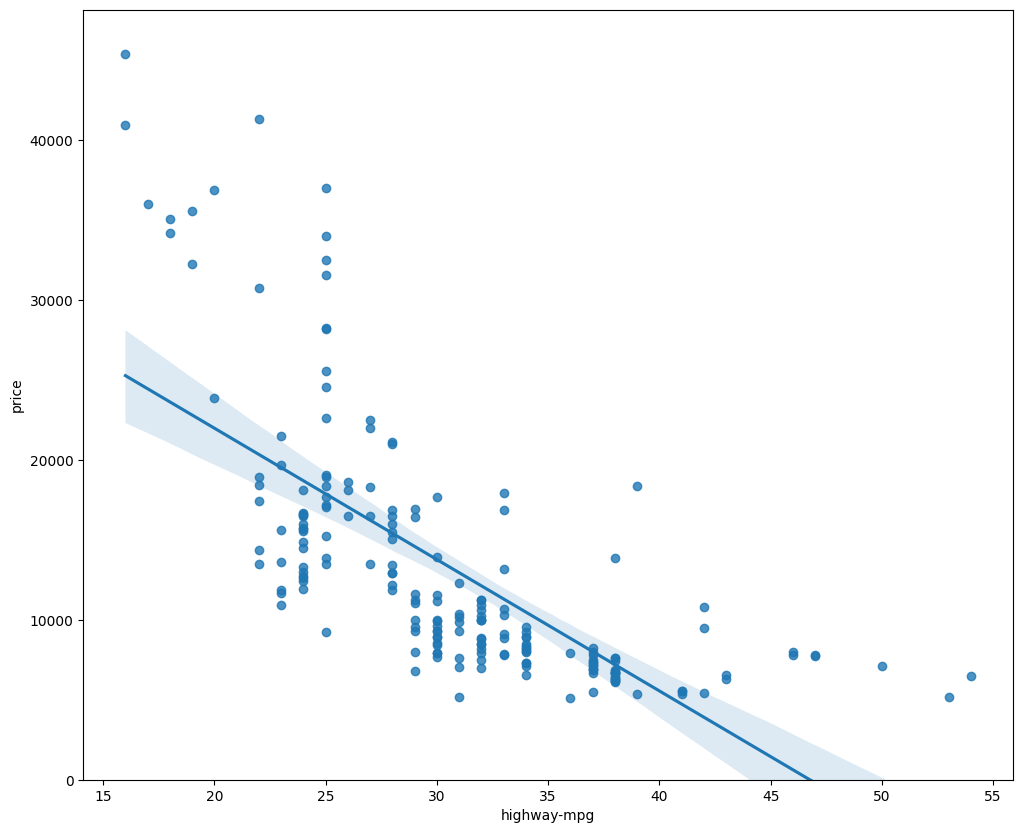

In [295]:
width=12
height=10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)


We can see from this plot that price is negatively correlated to highway-mpg since the regression slope is negative.

One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data

Let's compare this plot to the regression plot of "peak-rpm".

(0.0, 47414.1)

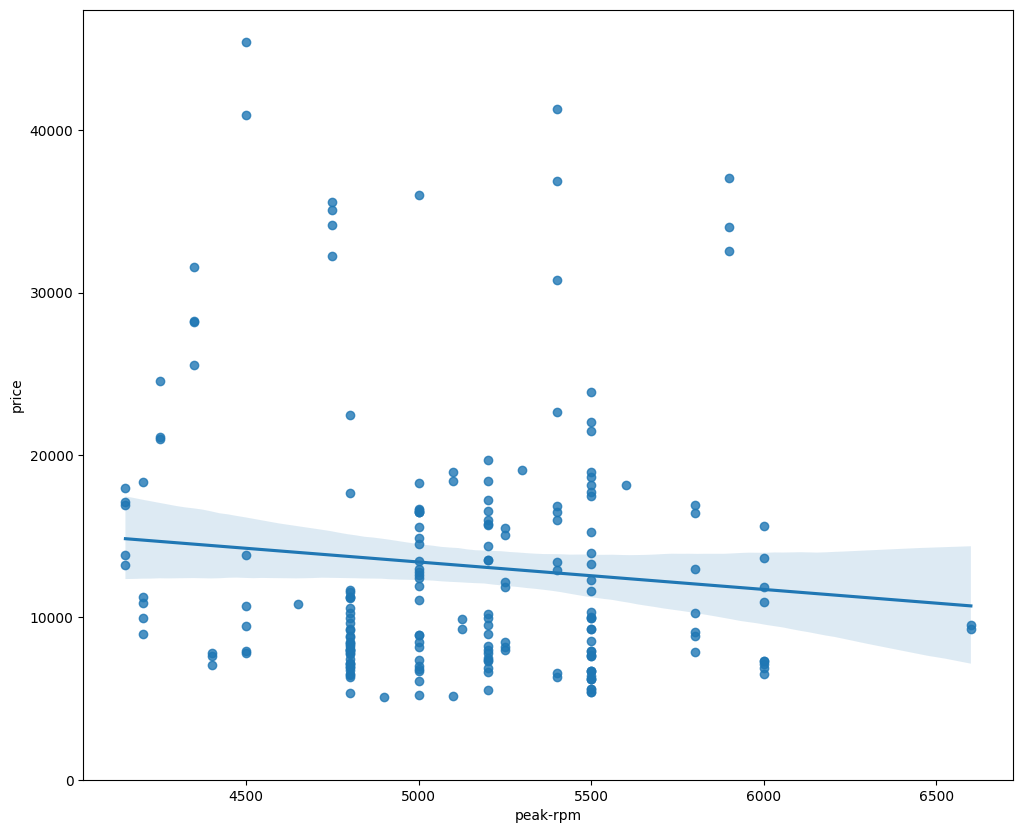

In [296]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Given the regression plots above, is "peak-rpm" or "highway-mpg" more strongly correlated with "price"? Use the method ".corr()" to verify your answer.

In [297]:
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616. You can verify it using the following command
df[["peak-rpm", "highway-mpg", "price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000



# Residual Plot

A good way to visualize the variance of the data is to use a residual plot.

What is a residual?

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

So what is a residual plot?

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

What do we pay attention to when looking at a residual plot?

We look at the spread of the residuals:

- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

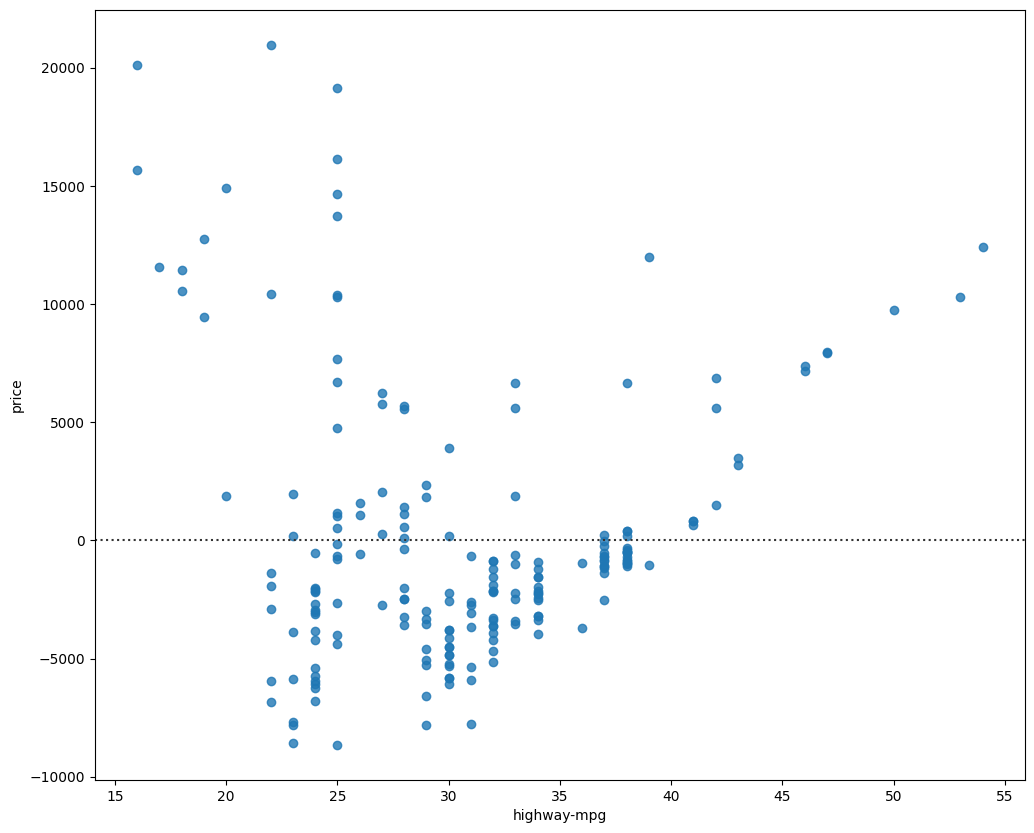

In [298]:
width=12
height=10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'], y=df['price'])
plt.show()


What is this plot telling us?

We can see from this residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

# Multiple Linear Regression

How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.

One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [299]:
Y_hat=lm.predict(Z)

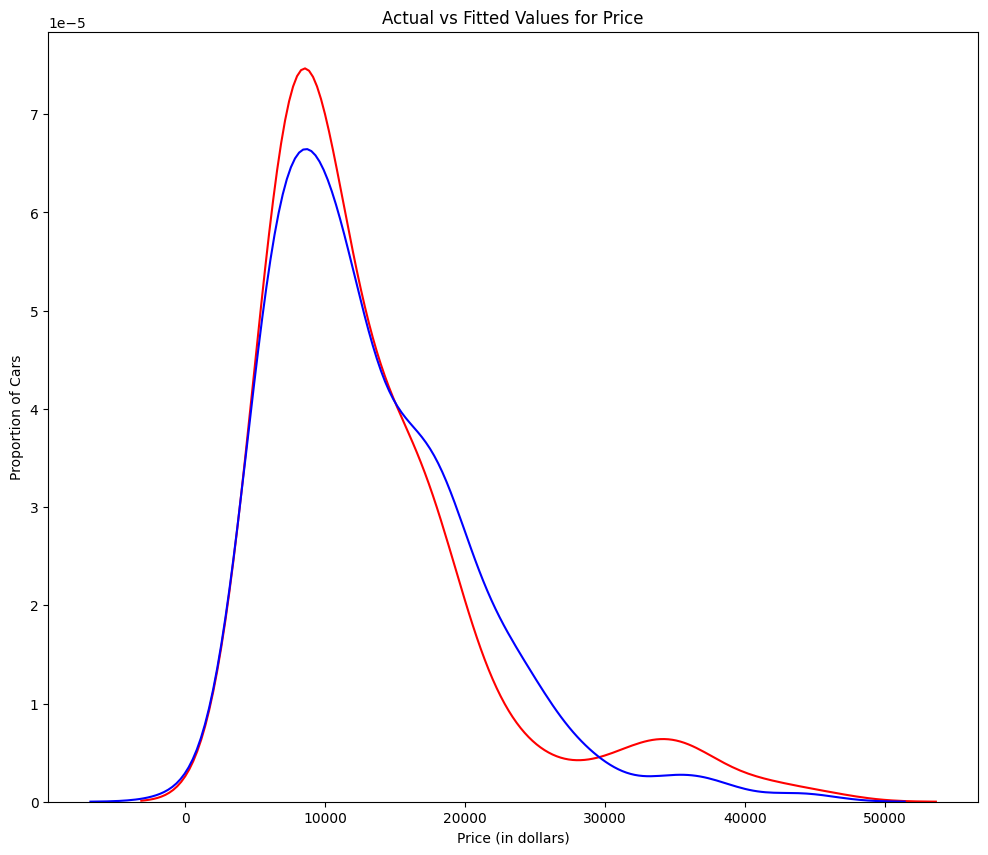

In [300]:
plt.figure(figsize=(width, height))

ax1=sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Value", ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()


We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

# 3. Polynomial Regression and Pipelines

In [301]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new=np.linspace(15, 55, 100)
    y_new=model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-' )
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax=plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig=plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    
    plt.show()
    plt.close()

In [302]:
x=df['highway-mpg']
y=df['price']

Let's fit the polynomial using the function polyfit, then use the function poly1d to display the polynomial function

In [303]:
# Here we use a polynomial of the 3rd order (cubic) 
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


In [304]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

Create 11 order polynomial model with the variables x and y from above.

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


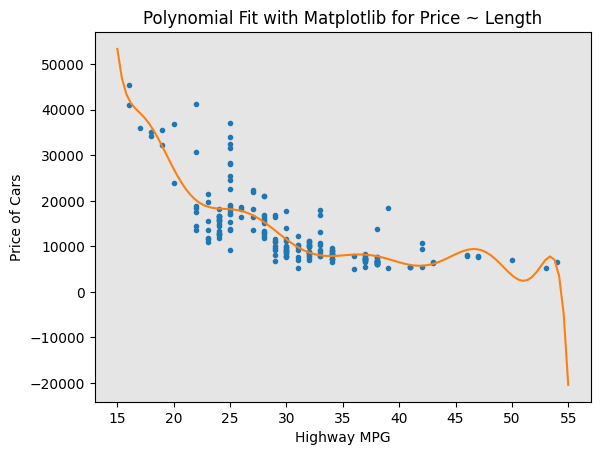

In [305]:
# Here we use a polynomial of the 11rd order (cubic)
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [306]:
from sklearn.preprocessing import PolynomialFeatures

In [307]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [308]:
Z_pr=pr.fit_transform(Z)

In the original data, there are 201 samples and 4 features.

In [309]:
Z.shape

(201, 4)


After the transformation, there are 201 samples and 15 features.

In [310]:
Z_pr.shape

(201, 15)

# Pipline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline.

In [311]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [312]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

We input the list as an argument to the pipeline constructor

In [313]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [314]:
Z=Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [315]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y.

In [316]:
Input=[('scale', StandardScaler()), ('model', LinearRegression())]

pipe=Pipeline(Input)
pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

4. Measures for In-Sample Evaluation

In [317]:
#Model 1: Simple Linear Regression

#highway_mpg_fit
lm.fit(X,Y)

#Fine the R^2
print('The R-square is: ', lm.score(X,Y))

The R-square is:  0.4965911884339176


Let's calculate the MSE:

In [318]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ',Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


import the function mean_squared_error from the module metrics:

In [319]:
from sklearn.metrics import mean_squared_error

In [320]:
mse=mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


Model 2: Multiple Linear Regression

In [321]:
#fit the model
lm.fit(Z, df['price'])

#Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Let's calculate the MSE.

We produce a prediction:

In [322]:
Y_predict_multifit=lm.predict(Z)


We compare the predicted results with the actual results:

In [323]:
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.870726492


Model 3: Polynomial Fit


In [324]:
from sklearn.metrics import r2_score

In [325]:
r_squared=r2_score(y,p(x))
print('The R-Square value is: ', r_squared)

The R-Square value is:  0.6741946663906517


# MSE

In [326]:
mean_squared_error(df['price'], p(x))

20474146.42636123


5. Prediction and Decision Making

In [327]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [328]:
new_input=np.arange(1,100,1).reshape(-1,1)

Fit the model:

In [329]:
lm.fit(X,Y)
lm

LinearRegression()


Produce a prediction:

In [330]:
yhat=lm.predict(new_input)
yhat[0:5]

c:\Users\rashm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

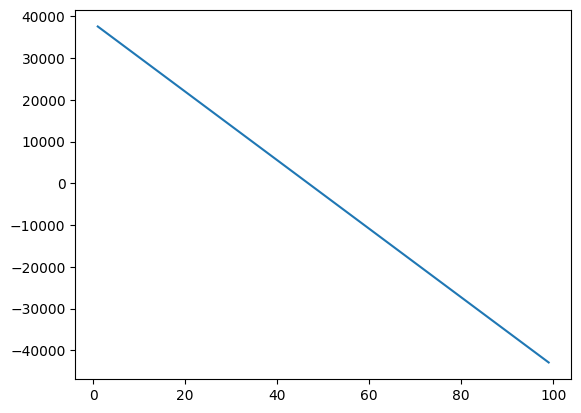

In [331]:
plt.plot(new_input, yhat)
plt.show()